In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from cairosvg import svg2png
from lxml import etree
import os, shutil

In [8]:
root_path = "/home/refenement/Projects/Dataset_flats/new/originals/prj/"
dataset_path = '/home/refenement/Projects/Dataset_flats/new/all/'
df = pd.read_csv('/home/refenement/Projects/Dataset_flats/flats_info.csv', 
                index_col=0)
df.index.name = ''
df.to_csv('/home/refenement/Projects/Dataset_flats/flats_info.csv')
df

,index,name,area,n_rooms,restroom,studio,storeroom,area_cat,no_livingroom,test
,,,,,,,,,,
0,0,3r_73m3_ts_sy,73.30,3,separate,True,True,"(70, 80]",False,False
1,1,3r_115m05_ts_sy,113.57,3,separate,True,False,"(110, 120]",False,False
2,2,3r_91m7_tt_sn,91.70,3,together,False,False,"(90, 100]",False,True
3,3,3r_77m4_ts_sy,77.40,3,2rooms,True,True,"(70, 80]",False,False
4,4,3r_65m2_ts_sn,65.20,3,separate,False,False,"(60, 70]",False,False
...,...,...,...,...,...,...,...,...,...,...
39,39,1r_31m14_tt_sy_180,31.14,1,together,True,False,"(30, 40]",False,False
40,40,1r_34m6_tt_sn_90,34.60,1,together,False,False,"(30, 40]",False,False
40,40,1r_34m6_tt_sn_270,34.60,1,together,False,False,"(30, 40]",False,False


In [3]:
df_ini = pd.read_csv('/home/refenement/Projects/Dataset_flats/flats_info_ini.csv', 
                     index_col=0)
# df_ini.drop('Unnamed: 0', axis=1, inplace=True)
# df_ini.to_csv('/home/refenement/Projects/Dataset_flats/flats_info_ini.csv')
df_ini

,name,area,n_rooms,restroom,studio,storeroom,area_cat,no_livingroom,test
index,,,,,,,,,
0,3r_73m3_ts_sy,73.30,3,separate,True,True,"(70, 80]",False,False
1,3r_115m05_ts_sy,113.57,3,separate,True,False,"(110, 120]",False,False
2,3r_91m7_tt_sn,91.70,3,together,False,False,"(90, 100]",False,True
3,3r_77m4_ts_sy,77.40,3,2rooms,True,True,"(70, 80]",False,False
4,3r_65m2_ts_sn,65.20,3,separate,False,False,"(60, 70]",False,False
5,3r_74m48_ts_sn,74.48,3,separate,False,False,"(70, 80]",False,False
6,3r_90m3_ts_sn,90.30,3,2rooms,False,True,"(90, 100]",False,False
7,3r_82m28_ts_sy,82.28,3,separate,False,False,"(80, 90]",False,False
8,3r_73m4_tt_sy,73.40,3,together,True,True,"(70, 80]",False,True


In [82]:
name = '3r_126m09_ts_sn'#df.name.iloc[0]
img = root_path + name + '_256.svg'
# img = Image.open(img).convert('RGB')
# img

In [83]:
img, df.columns

('/home/refenement/Projects/Dataset_flats/new/ini/prj/3r_126m09_ts_sn_256.svg',
 Index(['index', 'name', 'area', 'n_rooms', 'restroom', 'studio', 'storeroom',
        'area_cat', 'no_livingroom', 'test'],
       dtype='object'))

In [47]:
# df.to_csv('/home/refenement/Projects/Dataset_flats/flats_info.csv')

In [65]:
# remove unneded files

# import os
# df_names_1 = df.name.apply(lambda x: x + '_256_1.png').values
# df_names_21 = df.name.apply(lambda x: x + '_256_21.png').values
# counter = 0
# for f in os.listdir(dataset_path):
#     if f not in df_names_1 and f not in df_names_21:
#         os.remove(dataset_path + f)
    
# print(counter)

0


# Changing

## Change rooms color in _21

In [19]:
def change_room_color_svg(name, new_fold, color_rooms='#00ff00', on='#0000ff'):
    img_name = root_path + name + '_256.svg'
    tree = etree.parse(img_name)
    root = tree.getroot()
    
    # add white baskground 
    root.insert(2, etree.Element('rect', attrib={'width':"100%",'height':"100%",
                                                 'fill':"#ffffff"}
                                ))
    for i, c in enumerate(root):
        if c.tag == '{http://www.w3.org/2000/svg}g':
            if c.get('{http://www.inkscape.org/namespaces/inkscape}label')=='rooms':
                root[i].set('style', 'display:inline')
                for j, cc in enumerate(c):
                    style = cc.get('style')
                    if f'fill:{color_rooms}' in style:
                        style = style.replace(f'fill:{color_rooms}', 
                                              f'fill:{on}')
                        root[i][j].set('style', style)
            else:
                root[i].set('style', 'display:none')
                
    svg_name = root_path + new_fold + name + '_256.svg'
    tree.write(svg_name)
    svg2png(url=svg_name, write_to=dataset_path + new_fold + name + '_256_21.png')
         
        
# new_folder = 'wo_bedrooms/'
# if not os.path.exists(root_path + new_folder):
#     os.mkdir(root_path + new_folder)
# if not os.path.exists(dataset_path + new_folder):
#     os.mkdir(dataset_path + new_folder)
#     for file in os.listdir(dataset_path):
#         if '_256_1' in file:
#             shutil.copy(dataset_path + file, 
#                         dataset_path + new_folder + file)
    
# df_ini.name.apply(change_room_color_svg, new_fold=new_folder)

## Change _1

In [5]:
def change_filling(name, new_fold):
    img_name = root_path + name + '_256.svg'
    tree = etree.parse(img_name)
    root = tree.getroot()
    
    # add white baskground 
    root.insert(2, etree.Element('rect', attrib={'width':"100%",'height':"100%",
                                                 'fill':"#ffffff"}
                                ))
    layers = ['main', 'doors main']
    for i, c in enumerate(root):
        if c.tag == '{http://www.w3.org/2000/svg}g':
            label = c.get('{http://www.inkscape.org/namespaces/inkscape}label')
            if label in layers:
                root[i].set('style', 'display:inline')
                if label == 'main':
                    for j, cc in enumerate(c):
                        style = cc.get('style')
                        style = style.replace(f'fill:none', 
                                              f'fill:#808080')
                        style = style.replace('fill-opacity:0.5',
                                              'fill-opacity:1')#\
#                                               if 'fill-opacity:1' in style\
#                                             else style +';fill-opacity:0.5'
                        root[i][j].set('style', style)
            else:
                root[i].set('style', 'display:none')
                
    svg_name = root_path + new_fold + name + '_256.svg'
    tree.write(svg_name)
    svg2png(url=svg_name, write_to=dataset_path + new_fold + name + '_256_1.png') 

In [12]:
def change_ini(name, new_fold, fill_venv=False, layers_show=['main', 'doors main'], 
           layer_width=['doors main'],  val=1):
    img_name = root_path + name + '_256.svg'
    tree = etree.parse(img_name)
    root = tree.getroot()
    # add white baskground 
    root.insert(2, etree.Element('rect', attrib={'width':"100%",'height':"100%",
                                                 'fill':"#ffffff"}
                                ))
    for i, c in enumerate(root):
        if c.tag == '{http://www.w3.org/2000/svg}g':
            label = c.get('{http://www.inkscape.org/namespaces/inkscape}label')
            if label in layers_show:
                root[i].set('style', 'display:inline')
                if label == 'main':
                    for j, cc in enumerate(c):
                        style = cc.get('style')
                        style = style.replace(f'fill:none', 
                                              f'fill:#808080')
                        style = style.replace('fill-opacity:0.5',
                                              'fill-opacity:1')#\
#                                               if 'fill-opacity:1' in style\
#                                             else style +';fill-opacity:0.5'
                        root[i][j].set('style', style)
    
                if label in layer_width:
                    for j, cc in enumerate(c):
                        style = cc.get('style')
                        style = style.replace('stroke-width:1',
                                              f'stroke-width:{val}')
                        if fill_venv:
                            if style.find('stroke:#000080')!=-1:
                                style = style.replace('fill:none',
                                                      'fill:#000080')
                        root[i][j].set('style', style)
            else:
                root[i].set('style', 'display:none')
            
    svg_name = root_path + new_fold + name + '_256.svg'
    tree.write(svg_name)
    svg2png(url=svg_name, write_to=dataset_path + new_fold + name + '_256_1.png')

In [18]:
new_folder = 'no_rot_wo_bedrooms/'
if not os.path.exists(root_path + new_folder):
    os.mkdir(root_path + new_folder)
if not os.path.exists(dataset_path + new_folder):
    os.mkdir(dataset_path + new_folder)
    for file in os.listdir(dataset_path):
        if '_256_1' in file or '_256_21' in file:
            shutil.copy(dataset_path + file, 
                        dataset_path + new_folder + file)
    
    
        

df_ini.name.apply(change_ini, new_fold=new_folder, val=5)
df_ini.name.apply(change_room_color_svg, new_fold=new_folder)
# change_filling(name)

# df.name.apply(lambda x: change_filling(x))
# change_filling(name)

index
0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
Name: name, dtype: object

# Rorate img

In [89]:
import numpy as np

dataset_path = '/home/refenement/Projects/Dataset_flats/new/all/wo_bedrooms/'

def rotate(name, df, idx, add_name='_256_1.png', add_df=True):
    n = np.array(Image.open(dataset_path + name + add_name))
    for  i in idx:
        new_name = name + '_' + str(90 * i)
        Image.fromarray(np.rot90(n, k=i)).save(dataset_path + new_name + add_name)
        if add_df:
            new = df[df['name'] == name]
            new['name'] = new_name
            df = df.append(new)
    return df

In [90]:
df = pd.read_csv('/home/refenement/Projects/Dataset_flats/flats_info_ini.csv')
t = df['name']

idx = df.name.apply(lambda x: np.random.permutation([1,2,3])[:2])
for n, i in zip(t, idx):
    df = rotate(n, df, i, '_256_1.png', True)
    df = rotate(n, df, i, '_256_21.png', False)

<ipython-input-89-0fc4a5a3ffab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['name'] = new_name


In [91]:
df

,index,name,area,n_rooms,restroom,studio,storeroom,area_cat,no_livingroom,test
0,0,3r_73m3_ts_sy,73.30,3,separate,True,True,"(70, 80]",False,False
1,1,3r_115m05_ts_sy,113.57,3,separate,True,False,"(110, 120]",False,False
2,2,3r_91m7_tt_sn,91.70,3,together,False,False,"(90, 100]",False,True
3,3,3r_77m4_ts_sy,77.40,3,2rooms,True,True,"(70, 80]",False,False
4,4,3r_65m2_ts_sn,65.20,3,separate,False,False,"(60, 70]",False,False
...,...,...,...,...,...,...,...,...,...,...
39,39,1r_31m14_tt_sy_180,31.14,1,together,True,False,"(30, 40]",False,False
40,40,1r_34m6_tt_sn_90,34.60,1,together,False,False,"(30, 40]",False,False
40,40,1r_34m6_tt_sn_270,34.60,1,together,False,False,"(30, 40]",False,False
41,41,1r_43m8_tt_sn_90,43.80,1,together,False,True,"(40, 50]",False,False


In [92]:
df.to_csv('/home/refenement/Projects/Dataset_flats/flats_info.csv')

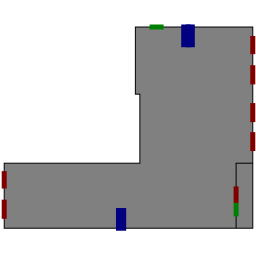

In [94]:
img = Image.open(dataset_path + name + '_256_1.png').convert('RGB')
img

# r,g,b = np.array(img).T
# green_area = (r==0) & (g==255) & (b==0)
# img = np.array(img)
# img.shape, green_area.shape

In [10]:
r,g,b = np.array(img).T
r[200,200], g[200,200], b[200,200]

(127, 127, 127)

In [11]:
img[green_area.T] = (0,0,255)
im2 = Image.fromarray(img)
im2

NameError: name 'green_area' is not defined

In [14]:
df

,index,name,area,n_rooms,restroom,studio,storeroom,area_cat,no_livingroom,test
0,0,3r_73m3_ts_sy,73.30,3,separate,True,True,"(70, 80]",False,False
1,1,3r_115m05_ts_sy,113.57,3,separate,True,False,"(110, 120]",False,False
2,2,3r_91m7_tt_sn,91.70,3,together,False,False,"(90, 100]",False,True
3,3,3r_77m4_ts_sy,77.40,3,2rooms,True,True,"(70, 80]",False,False
4,4,3r_65m2_ts_sn,65.20,3,separate,False,False,"(60, 70]",False,False
5,5,3r_74m48_ts_sn,74.48,3,separate,False,False,"(70, 80]",False,False
6,6,3r_90m3_ts_sn,90.30,3,2rooms,False,True,"(90, 100]",False,False
7,7,3r_82m28_ts_sy,82.28,3,separate,False,False,"(80, 90]",False,False
8,8,3r_73m4_tt_sy,73.40,3,together,True,True,"(70, 80]",False,True
9,9,3r_84m23_ts_sy,84.23,3,2rooms,True,True,"(80, 90]",False,False
